#**Problem Statement**

To develop a machine learning-based crop recommendation system that predicts the most suitable crop to cultivate.                                                           

# **Data Overview**

Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

# **Data Fields**

**N** - Ratio of Nitrogen content in soil

**P** - Ratio of Phosphorous content in soil

**K** - Ratio of Potassium content in soil

**Temperature** - Temperature in degree Celsius

**Humidity** - Relative humidity in %

**PH** - Potential of Hydrogen value of the soil

**Rainfall** - Rainfall in mm


#**LIBRARIES USED**

In [3]:
#Importing Neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#**READING THE FILE**



In [4]:
a = pd.read_csv("CROp.csv.xls")

In [5]:
a

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#**CHANGING LABEL COLUMN DATA INTO NUMERICAL DATA**

In [6]:
#labling the label column crop to 1 to 21
labels = LabelEncoder()
a['label'] = labels.fit_transform(a['label'])
label_mapping = dict(zip(labels.classes_, labels.transform(labels.classes_)))
print("Label Mapping:","\n", label_mapping)

Label Mapping: 
 {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [7]:
a.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


#**DOING PREPROCESSING TECHNIQUES**

**Describing The data**

Describe() function provides summary statistics of a DataFrame or a Series.

In [8]:
#Describing the Dataset
description = a.drop(columns=['label']).describe()
description

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Dtype Function**

The dtype function is used to check the data type of a column, Series, or NumPy array.

In [9]:
#Data Types of Dataset
a.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int64
dtype: object

In [10]:
#Checking if any Data is Null or Not
a.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
#Checking Duplicate Data
d=a.duplicated().sum()
d

np.int64(0)

# **STANDARDIZATION**

Standardization is a data preprocessing technique used to rescale features so that they have:

Mean = 0

Standard Deviation = 1


In [12]:
#using standard scaler function
scaler = StandardScaler()
features = a.drop('label', axis=1)
standardized_features = scaler.fit_transform(features)
a[features.columns] = scaler.fit_transform(features)
a.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,20
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,20
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,20
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,20
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,20


# **NORMALISATION**

Normalization is a technique to rescale feature values so they fit in a fixed range, usually [0, 1].

In [13]:
#usng min max scaler
minmax_scaler = MinMaxScaler()
features = a.drop('label', axis=1)
a[features.columns] = minmax_scaler.fit_transform(features)
a.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20


# **OUTLIERS DETECTION**

Outliers are data points that are significantly different from the majority of the data — they "stick out" from the rest.

In [14]:
#these are the quantiles
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1 #here finding interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (a < lower_bound) | (a > upper_bound)

a_no_outliers_iqr = a[~outliers_iqr.any(axis=1)]

print("Original DataFrame Shape (IQR):", a.shape)
print("DataFrame Shape after Removing Outliers (IQR):", a_no_outliers_iqr.shape)

Original DataFrame Shape (IQR): (2200, 8)
DataFrame Shape after Removing Outliers (IQR): (1768, 8)


#**PLOTTING BOX PLOT**

A box plot is a visualization tool that summarizes the distribution of a dataset and highlights outliers.

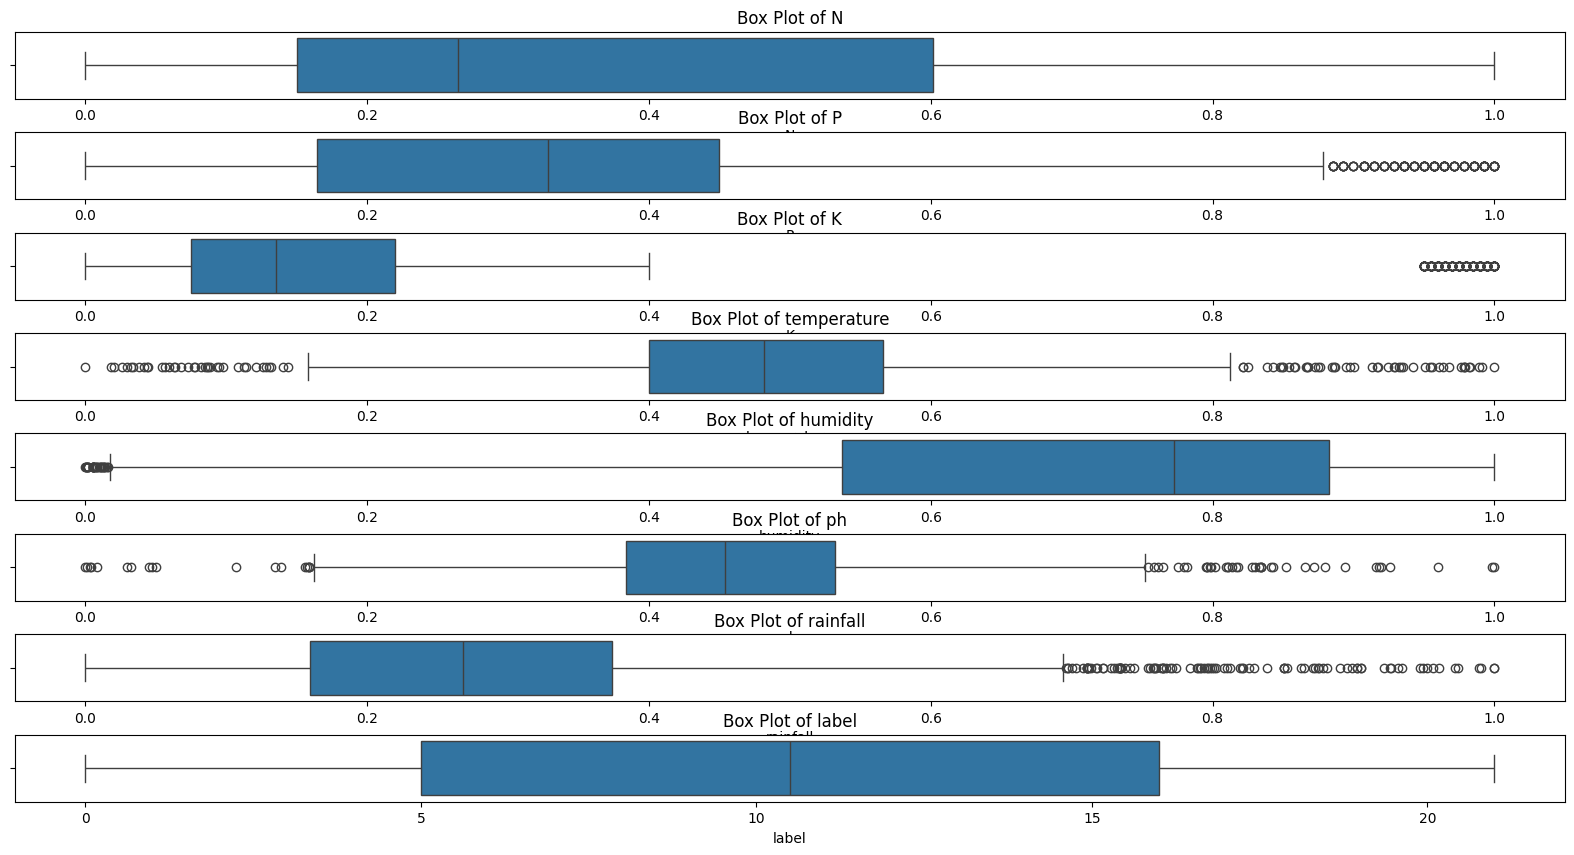

In [15]:
# outliers are placed using Box plot
numerical_features = a.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)  # Create a subplot for each feature
    sns.boxplot(x=a[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.subplots_adjust(hspace=0.5)

In [16]:
#Training and Test Sets
X = a.drop('label', axis=1)
y = a['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **DECISION TREE**

A Decision Tree is a popular supervised machine learning algorithm used for classification. It's called a tree because it mimics a flowchart-like structure — decisions branch out like tree limbs 🌳.

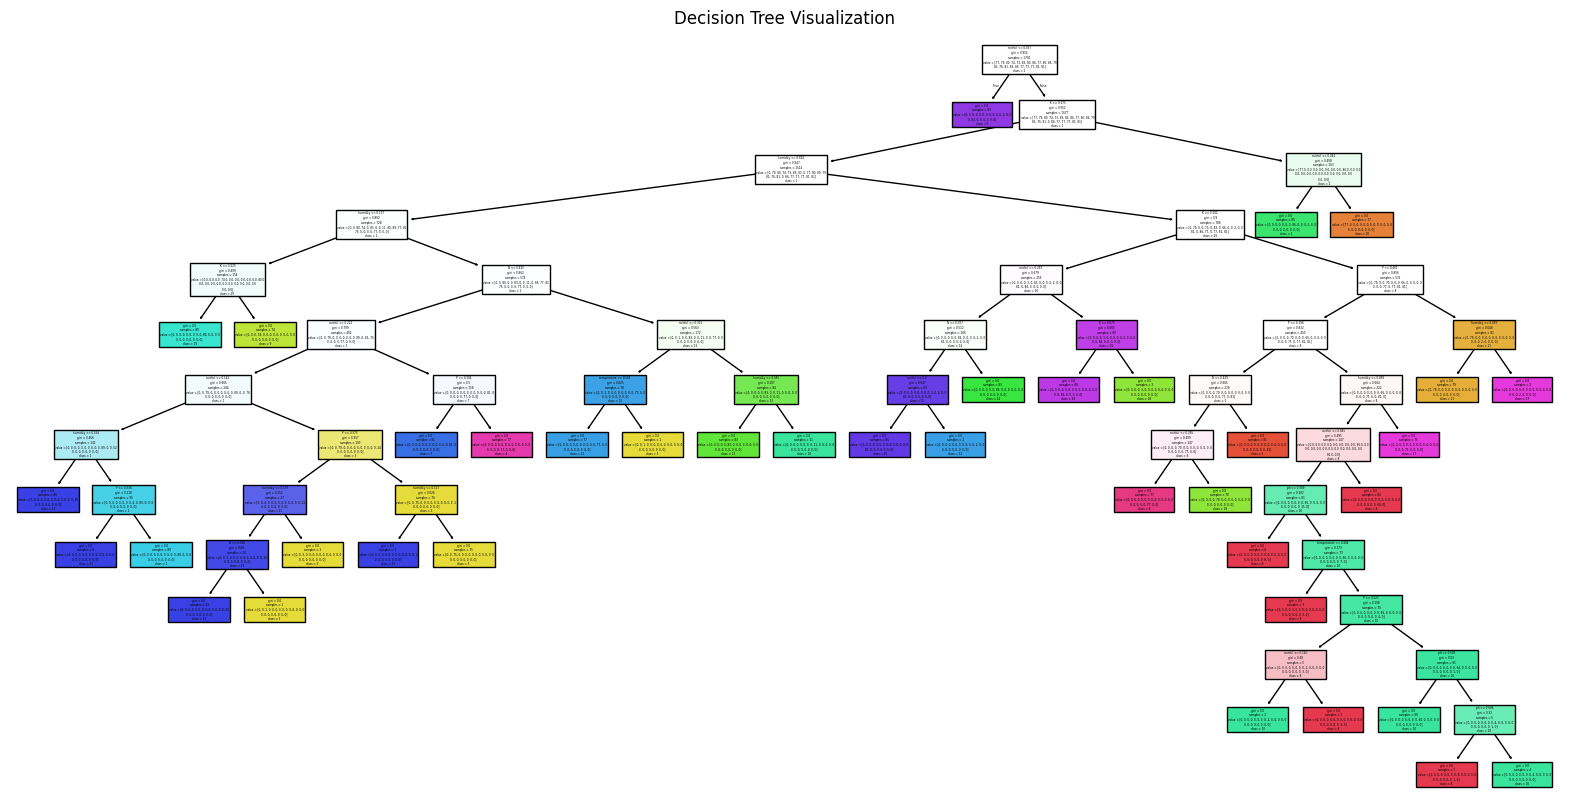

In [17]:
#using decision tree classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.astype(str), class_names=y.unique().astype(str))
plt.title('Decision Tree Visualization')
plt.show()

In [18]:
# # Here the graph is made to max level 3 to be checked and understand properly
# model = DecisionTreeClassifier(max_depth=3, random_state=42)
# model.fit(X_train, y_train)
# plt.figure(figsize=(30, 15), dpi=100)
# fig = plt.figure(figsize=(40, 20), dpi=150)
# plot_tree(model, filled=True, feature_names=X.columns.astype(str), class_names=y.unique().astype(str)) # Now you can plot the tree
# plt.title('Decision Tree Visualization')
# plt.savefig('decision_tree.png', bbox_inches='tight')
# plt.show()
# plt.close()

# **FEATURE IMPORTANCE**
 it helps identify which input features have the most influence on the model’s predictions.

       Feature  Importance
6     rainfall    0.351099
4     humidity    0.187216
1            P    0.162547
2            K    0.145078
0            N    0.141650
5           ph    0.008189
3  temperature    0.004220


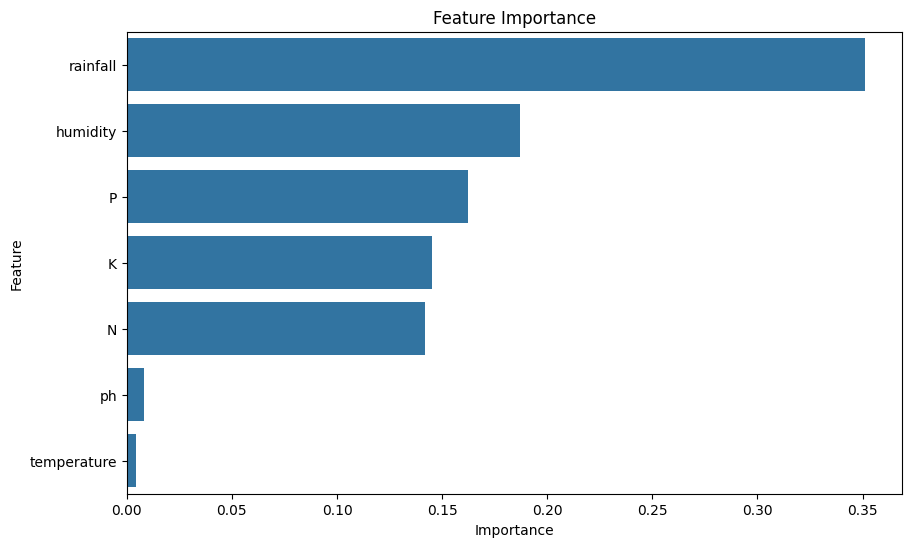

In [19]:
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# **ACCURACY**
This evaluate the model's performance using accuracy score


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9863636363636363


# **CLASSIFICATION REPORT**

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

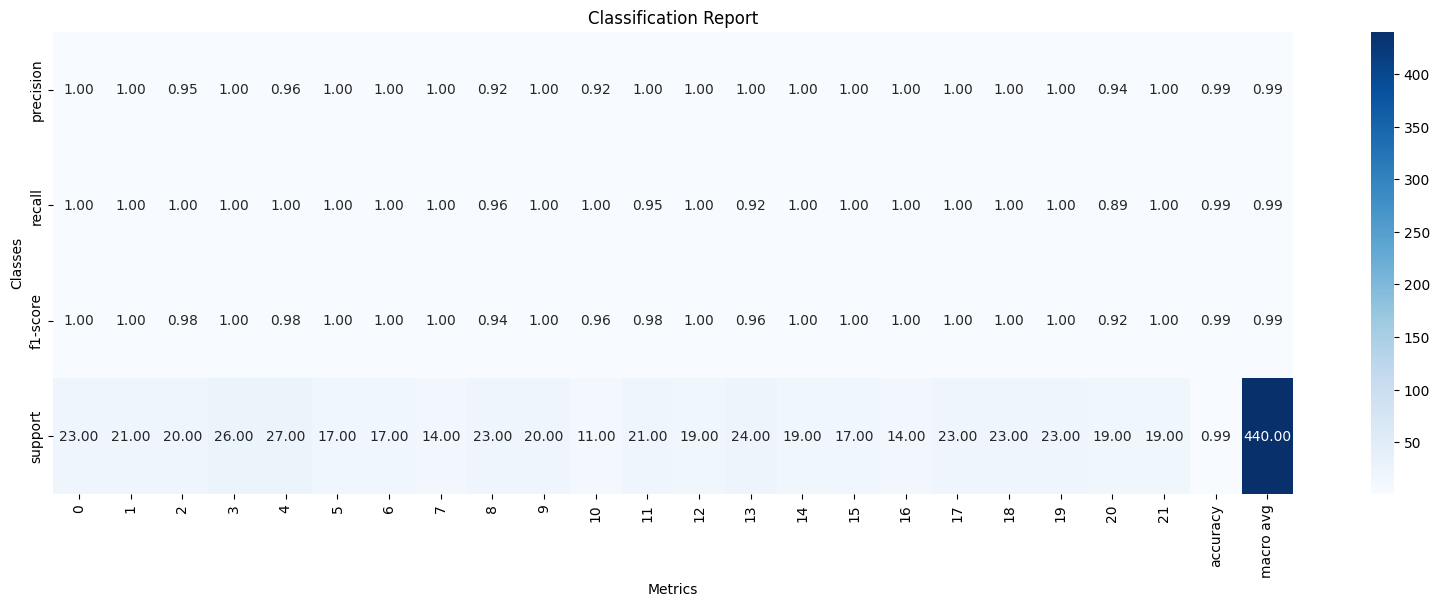

In [21]:
class_report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))
report_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(20, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# **CONFUSION MATRIX**

The confusion matrix shows how well the model predicted each class by comparing actual vs. predicted labels.




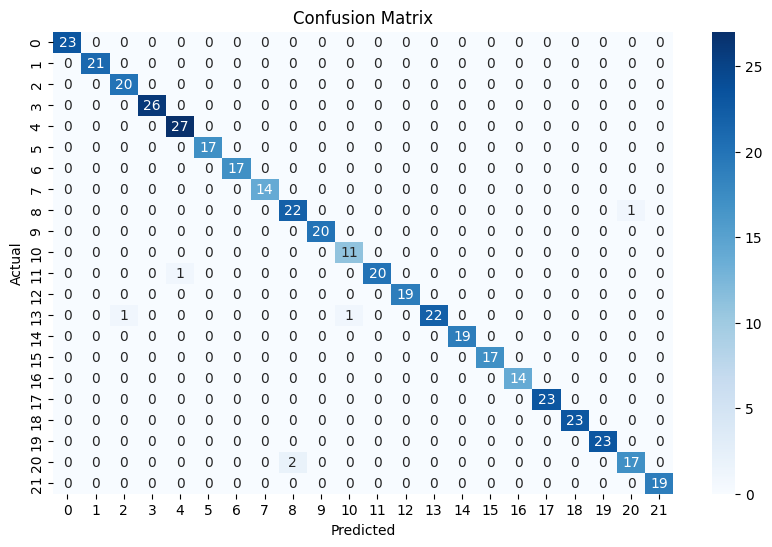

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**CLUSTERING**
Clustering groups crops with similar soil and climate requirements, helping identify patterns and recommend region-specific crop types.

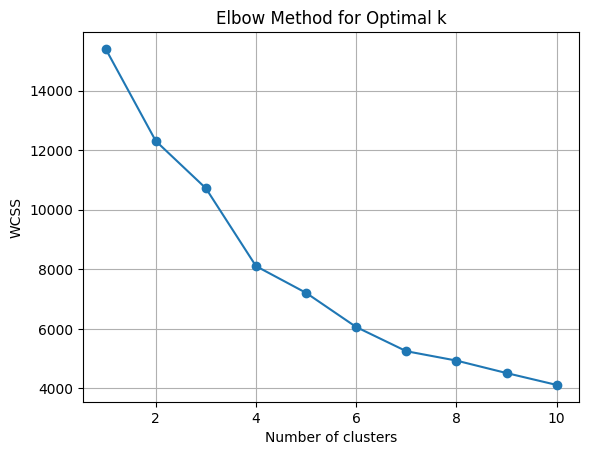

In [23]:
#kmeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(standardized_features)
    wcss.append(kmeans.inertia_)

#Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#**KMEANS AND CLUSTERING GRAPH**
KMeans clustering segments crops into distinct groups based on similarities in soil nutrients and environmental conditions.


The PCA scatter plot visualizes crop clusters in 2D space, highlighting how similar crops are grouped together based on feature patterns.

      label  Cluster
0        20        1
1        20        1
2        20        1
3        20        1
4        20        1
...     ...      ...
2195      5        1
2196      5        2
2197      5        2
2198      5        2
2199      5        2

[2200 rows x 2 columns]


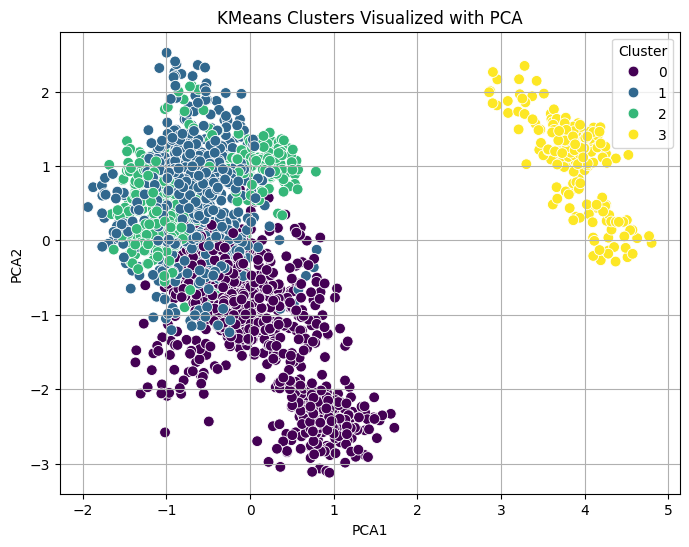

Cluster  label
0        2        100
         3        100
         9        100
         10       100
         11        18
         12       100
         13       100
         14        91
         18        88
1        4        100
         5         47
         8         99
         16       100
         17        60
         18        12
         19       100
         20       100
2        1        100
         5         53
         6        100
         8          1
         11        82
         14         9
         15       100
         17        40
         21       100
3        0        100
         7        100
dtype: int64

In [24]:
# Applying KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(standardized_features)
a['Cluster'] = cluster_labels
print(a[['label', 'Cluster']])

# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels


# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=60)
plt.title("KMeans Clusters Visualized with PCA")
plt.grid()
plt.show()

cluster_summary = a.groupby('Cluster').mean(numeric_only=True)
cluster_summary

a.groupby(['Cluster', 'label']).size()
